# CSV Files

In [1]:
import csv

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

%matplotlib inline

## Python Standard Library

### Read CSV data with a header...

In [8]:
data = []

with open("data_with_headers.csv") as csv_file:
    
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        data.append(list(row.values()))
        # data.append([ int(v) for v in row.values() ])
        
data

[['1', '2', '3', '4', '5'],
 ['6', '7', '8', '9', '10'],
 ['11', '12', '13', '14', '15']]

### Read CSV data without a header...

In [13]:
data = []

with open("data_without_headers.csv") as csv_file:
    
    csv_reader = csv.reader(csv_file)
    
    for row in csv_reader:
        # data.append(row)
        data.append([ int(v) for v in row ])
        
data

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]]

In [14]:
data_arr = np.array(data, dtype=np.int8)

print(data_arr.dtype)
data_arr

int8


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int8)

## NumPy

In [22]:
data = np.loadtxt("data_with_headers.csv", delimiter=",", skiprows=1, dtype=np.int8)

data[1,2] = 99

data

array([[ 1,  2,  3,  4,  5],
       [ 6,  7, 99,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int8)

## Max, Min, and Sum

In [23]:
print(np.max(data))
print(np.min(data))

99
1


In [25]:
print(np.max(data, axis=0))
print(np.min(data, axis=0))

[11 12 99 14 15]
[1 2 3 4 5]


In [26]:
print(np.max(data, axis=1))
print(np.min(data, axis=1))

[ 5 99 15]
[ 1  6 11]


In [27]:
print(data.max())
print(data.min())

99
1


In [28]:
print(data.max(axis=0))
print(data.min(axis=0))

[11 12 99 14 15]
[1 2 3 4 5]


In [29]:
print(data.max(axis=1))
print(data.min(axis=1))

[ 5 99 15]
[ 1  6 11]


In [31]:
print(np.sum(data))
print(data.sum())

211
211


In [32]:
print(np.sum(data, axis=0))
print(data.sum(axis=0) )

[ 18  21 115  27  30]
[ 18  21 115  27  30]


In [33]:
print(np.sum(data, axis=1))
print(data.sum(axis=1))

[ 15 131  65]
[ 15 131  65]


In [34]:
print(sum(data)) # np.sum(data, axis=0)

[ 18  21 115  27  30]


## Row and Column Stacking

In [35]:
data

array([[ 1,  2,  3,  4,  5],
       [ 6,  7, 99,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int8)

In [37]:
# col = np.array([997, 998, 999])

col = data.sum(axis=1)

data = np.column_stack([ data, col ])

data

array([[  1,   2,   3,   4,   5,  15],
       [  6,   7,  99,   9,  10, 131],
       [ 11,  12,  13,  14,  15,  65]])

In [38]:
row = data.sum(axis=0)

data = np.row_stack([ data, row ])

data

array([[  1,   2,   3,   4,   5,  15],
       [  6,   7,  99,   9,  10, 131],
       [ 11,  12,  13,  14,  15,  65],
       [ 18,  21, 115,  27,  30, 211]])

## Matplotlib Multiple Plots and Chart Customizing

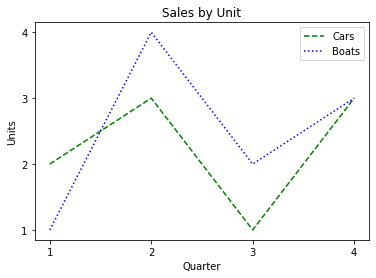

In [40]:
car_sales = np.array([
    [1,2], [2,3], [3,1], [4,3]
])

boat_sales = np.array([
    [1,1], [2,4], [3,2], [4,3]
])

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(car_sales[:, 0], car_sales[: ,1], label="Cars", color="green", linestyle="dashed")
plt.plot(boat_sales[:, 0], boat_sales[: ,1], label="Boats", color="blue", linestyle="dotted")

plt.title("Sales by Unit")
plt.xlabel("Quarter")
plt.ylabel("Units")

plt.legend(loc="upper right")

plt.show()